# Projeto 1: Analisando Vinhos

**Objetivo:** Familiarização com a linguagem Python e com as bibliotecas numpy, sklearn, pandas, matplotlib, etc.

## 1 e 2. Base de Dados e Dimensões

Nessa parte, será carregado a base de dados e criado uma planilha unificada: vinho tinto e branco.

In [42]:
# Leitura dos Dados (dataframe pandas)
import pandas as pd
df_red = pd.read_csv("/content/winequality-red.csv", sep=';')
df_white = pd.read_csv("/content/winequality-white.csv", sep=';')

In [43]:
# Exibindo as 5 primeiras linha do dataframe pandas (vinho tinto)
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
# Exibindo as 5 primeiras linha do dataframe pandas (vinho branco)
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
# Verificando a dimensão dos dados

# Dados: vinho tinto
df_red.shape

(1599, 12)

In [46]:
# Dados: vinho branco
df_white.shape

(4898, 12)

Conforme os códigos acima, conclui-se que:



*   A base de dados vinho tinto apresenta 1599 linhas por 12 colunas.
*   A base de dados de vinho branco apresenta 4898 por 12 colunas.



In [47]:
# Criando a coluna labels em ambos os dataframe pandas
df_red['labels'] = 0
df_white['labels'] = 1

# Concatenando os dados
data = pd.concat([df_red, df_white], ignore_index=True)

Para unir os dados em um único conjunto, foi realizada uma rotulagem para definir as classes de vinho tinto e vinho branco. Dessa forma:


*   0: Vinho tinto
*   1: Vinho branco

Em resumo, foi criada uma coluna denominada 'labels' para indicar essa distinção.


In [48]:
# Exibindo as 5 primeiras linhas do dataframe pandas concatenado
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## 3. Primeiros levantamentos da Base de Dados

A base de dados é consistente?

**Resposta:** Considerando os levantamentos abaixo e os demais envolvidos no paper "Modeling wine preferences by data mining from physicochemical properties", a base de dados é consistente. Ou seja, foram coletados de forma rigorosa e padronizada, testadoss por uma entidade oficial certificadora (CVRVV). Além disso, o processo de coleta foi automatizado por um sistema informatizado (iLab), minimizando erros humanos e garantindo uniformidade no registro das informações.

Há dados faltantes?

**Resposta:** A base não apresenta dados faltantes, conforme resultado do código implementado abaixo.

In [49]:
# Verifica a quantidade de dados ausentes por coluna do dataframe pandas
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Há dados não numéricos?

**Resposta** Não. Segundo os resultados do código a seguir, as colunas do dataframe pandas apresentam dados do tipo float64 e int64

In [50]:
# Verificando tipos de dados no dataframe pandas
data.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


A base de dados é balanceada (Classes vinho tinto e branco)?

**Resposta:** A classe não está balanceada. Ao verificar a quantidade de elementos por classe (em termos percentuais), observa-se que a classe 0 (vinho tinto) representa cerca de 75% dos dados, aproximadamente.

In [51]:
# Verificando o percentual de elementos por classe (%)
data['labels'].value_counts(normalize=True) * 100

,proportion
labels,
1,75.388641
0,24.611359


## 4. Análise Estatística dos Dados

O objetivo nessa parte é fazer um levantamento das variáveis de entrada mais relevantes para o processo de classificação dos vinhos, isto é, vinho tinto e branco. Nesse sentido, será avaliado, a priori, a correlação das variáveis seguida de análises gráficas. Por fim, a estratégia desenvolvida no artigo "Modeling wine preferences by data mining from physicochemical properties" será implementada a fins de discussão.

In [52]:
# Cálculo de correlação
# Gerando tabela de correlação dos dados
data.corr()['labels'].sort_values(ascending=False)

,labels
labels,1.000000
total sulfur dioxide,0.700357
free sulfur dioxide,0.471644
residual sugar,0.348821
citric acid,0.187397
quality,0.119323
alcohol,0.032970
pH,-0.329129
density,-0.390645
fixed acidity,-0.486740


Por exemplo, pode-se verificar uma correlação de, aproximadamente, 70% entre 'total sulfur dioxide' e as classes vinho tinto e branco ('labels').

In [53]:
# Bibliotecas para plots
import seaborn as sns
import matplotlib.pyplot as plt

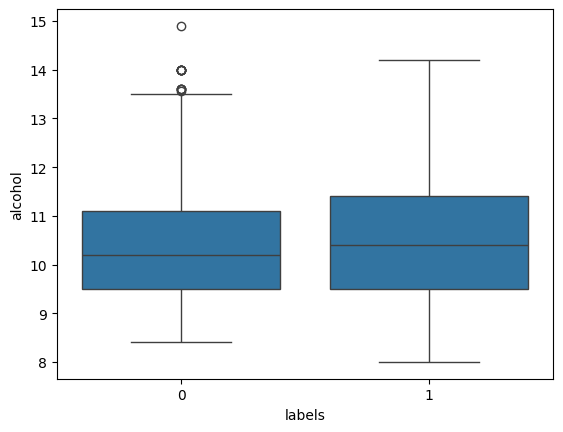

In [54]:
# Análises exploratórias
# Variável 'alcohol'

sns.boxplot(x='labels', y='alcohol', data=data)
plt.show()

Observa-se que as medianas de ambos os labels estão bem próximas, havendo uma sobreposição entre as duas caixas. Uma observação é a presença de outliers para classe de vinho tinto, isto é, valores de álcool acima de 14.

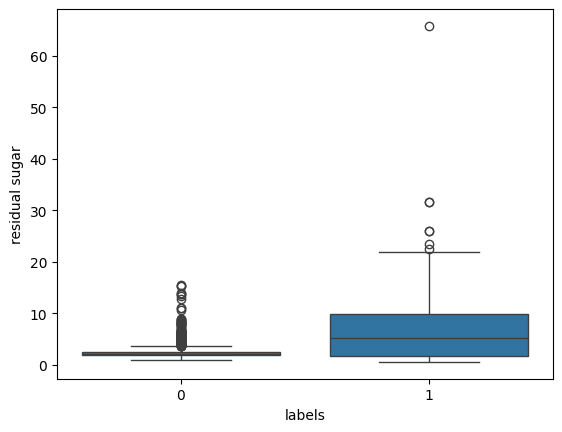

In [55]:
# Análises exploratórias
# Variável 'residual sugar'

sns.boxplot(x='labels', y='residual sugar', data=data)
plt.show()

## 6. Prevalência dos Vinhos: Fator de Qualidade

Com base na variável **'quality'**, serão verificados os vinhos com as maiores e menores avaliações. No caso:



*   Qualidade > 7 => Avaliações Boas
*   Qualidade < 3 => Avaliações Ruins



In [56]:
# Separação dos vinhos
df_vinho_tinto = data[data['labels']==0]
df_vinho_branco = data[data['labels']==1]

In [57]:
# Avaliação na classe vinho tinto
vinho_tinto_high = (sum(df_vinho_tinto['quality'] > 7)/len(df_vinho_tinto))*100
vinho_tinto_low = (sum(df_vinho_tinto['quality'] < 3)/len(df_vinho_tinto))*100
print(f'{vinho_tinto_high:.2f}% são mais bem avaliados')
print(f'{vinho_tinto_low:.2f}% apresentam avaliações ruins')

1.13% são mais bem avaliados
0.00% apresentam avaliações ruins


In [58]:
vinho_branco_high = (sum(df_vinho_branco['quality'] > 7)/len(df_vinho_branco))*100
vinho_branco_low = (sum(df_vinho_branco['quality'] < 3)/len(df_vinho_branco))*100
print(f'{vinho_branco_high:.2f}% são mais bem avaliados')
print(f'{vinho_branco_low:.2f}% apresentam avaliações ruins')

3.67% são mais bem avaliados
0.00% apresentam avaliações ruins


## 6. Random Forest

**Implementação do Random Forest**

In [59]:
# Bibliotecas para implementação e avaliação do modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Para verificar a **'quality'**, vamos, primeiramente, aplicar o RandomForest para as classes de vinho tinto e vinho branco separadas.

Variável com maior correlação: **alcohol**

**Contexto 1 -  Vinho Tinto**

In [60]:
df_red.shape

(1599, 13)

In [61]:
# Features
X = df_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
# Labels ('Quality')
y = df_red['quality']

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Predição do modelo
y_pred = model.predict(X_test)

In [63]:
# Verificando a acurácia
resAcuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {resAcuracia*100:.2f} %")

Acurácia: 65.94 %


**Contexto 2 -  Vinho Branco**

In [64]:
# Features
X = df_white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
# Labels ('Quality')
y = df_white['quality']

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Predição do modelo
y_pred = model.predict(X_test)

In [66]:
# Verificando a acurácia
resAcuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {resAcuracia*100:.2f} %")

Acurácia: 68.98 %


In [67]:
df_white.shape

(4898, 13)

**Contexto 3 -  Vinho Branco e Tinto**

In [68]:
# Features
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
# Labels ('Quality')
y = data['quality']

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Predição do modelo
y_pred = model.predict(X_test)

In [70]:
# Verificando a acurácia
resAcuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {resAcuracia*100:.2f} %")

Acurácia: 67.00 %


**Tentativa de redução de variáveis na base total**

In [71]:
# Features
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
# Labels ('Quality')
y = data['quality']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


alcohol                 0.123531
density                 0.103229
volatile acidity        0.100498
total sulfur dioxide    0.091670
chlorides               0.087901
sulphates               0.086368
free sulfur dioxide     0.086210
pH                      0.084298
residual sugar          0.083807
citric acid             0.077567
fixed acidity           0.074921
dtype: float64


In [72]:
var = ['alcohol', 'density','volatile acidity']

In [73]:
# Features
X = data[var]
# Labels ('Quality')
y = data['quality']

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Predição do modelo
y_pred = model.predict(X_test)

In [75]:
# Verificando a acurácia
resAcuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {resAcuracia*100:.2f} %")

Acurácia: 62.08 %


**SMOTE**

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Separando features e rótulos
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']]
y = data['quality']

In [77]:
# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [78]:
# Predição
y_pred = model.predict(X_test)

# Avaliação
resAcuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {resAcuracia*100:.2f} %")

Acurácia: 63.69 %


**RESUMO (OUTRAS MÉTRICAS)**

In [82]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, digits=3))

Relatório de Classificação:
              precision    recall  f1-score   support

           3      0.200     0.167     0.182         6
           4      0.260     0.302     0.280        43
           5      0.688     0.696     0.692       428
           6      0.707     0.621     0.661       567
           7      0.540     0.681     0.602       216
           8      0.405     0.436     0.420        39
           9      0.000     0.000     0.000         1

    accuracy                          0.637      1300
   macro avg      0.400     0.415     0.405      1300
weighted avg      0.646     0.637     0.639      1300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
